In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
 extracting: data/test/surprise/PrivateTest_25271151.jpg  
 extracting: data/test/surprise/PrivateTest_59347947.jpg  
 extracting: data/test/surprise/PublicTest_84428313.jpg  
 extracting: data/test/surprise/PublicTest_46144482.jpg  
 extracting: data/test/surprise/PrivateTest_66905202.jpg  
 extracting: data/test/surprise/PublicTest_77274972.jpg  
 extracting: data/test/surprise/PublicTest_59751984.jpg  
 extracting: data/test/surprise/PrivateTest_26572350.jpg  
 extracting: data/test/surprise/PrivateTest_37963456.jpg  
 extracting: data/test/surprise/PrivateTest_81424886.jpg  
 extracting: data/test/surprise/PrivateTest_18865959.jpg  
 extracting: data/test/surprise/PublicTest_22194410.jpg  
 extracting: data/test/surprise/PrivateTest_50884349.jpg  
 extracting: data/test/surprise/PublicTest_5351857.jpg  
 extracting: data/test/surprise/PrivateTest_99502303.jpg  
 extracting: data/test/surprise/PrivateTest_48185502.jpg  
 extracting:

In [ ]:
# !zip -r data.zip data
# from google.colab import files
# files.download('data.zip')

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
import torchvision
import scipy.io
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gdrive


In [ ]:
all_images = get_image_files('data')

In [ ]:
all_images[-3:]

(#3) [Path('data/test/happy/PublicTest_61433379.jpg'),Path('data/test/happy/PublicTest_28572682.jpg'),Path('data/test/happy/PublicTest_17688489.jpg')]

In [ ]:
parent_label(all_images[0])

'sad'

In [ ]:
splitter = GrandparentSplitter('train', 'test')

In [ ]:
blocks = ImageBlock, CategoryBlock

In [ ]:
dblock = DataBlock(blocks    = blocks,
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter  = splitter)

In [ ]:
dls = dblock.dataloaders('data')

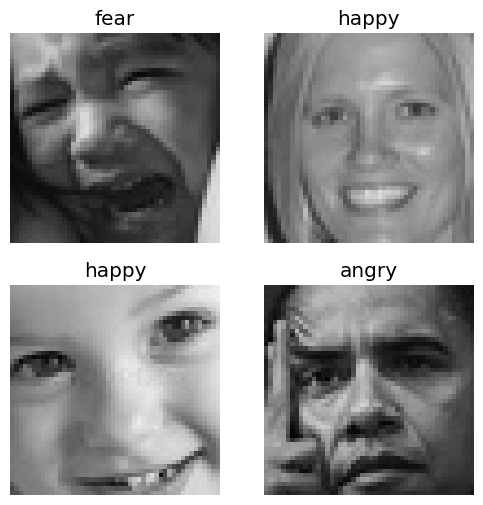

In [ ]:
dls.train.show_batch(max_n=4, nrows=2)

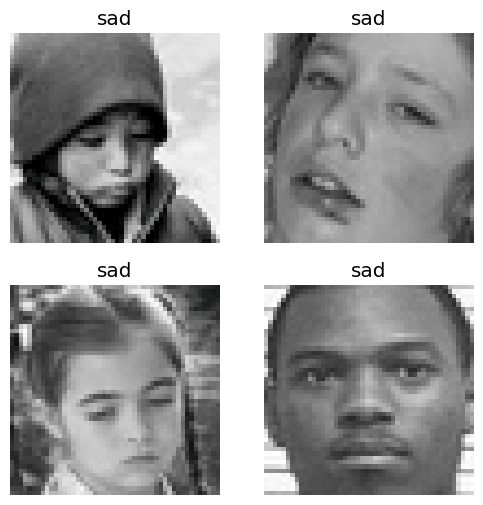

In [ ]:
dls.valid.show_batch(max_n=4, nrows=2)

In [ ]:
first(dls.valid)

(TensorImage([[[[ 1.9578,  1.3242,  0.5193,  ...,  1.8037,  1.8037,  1.7865],
                [ 2.0605,  1.0331,  0.4166,  ...,  1.8208,  1.8037,  1.7865],
                [ 1.8037,  0.6049,  0.3481,  ...,  1.7865,  1.8037,  1.8037],
                ...,
                [ 0.4166, -0.5253, -0.4397,  ..., -1.1932,  1.3242,  2.2489],
                [ 0.5707, -0.3027, -0.7479,  ..., -1.3987,  0.0569,  1.7009],
                [ 0.4851,  0.0227, -0.8335,  ..., -1.8268, -0.7993,  0.6049]],
 
               [[ 2.1310,  1.4832,  0.6604,  ...,  1.9734,  1.9734,  1.9559],
                [ 2.2360,  1.1856,  0.5553,  ...,  1.9909,  1.9734,  1.9559],
                [ 1.9734,  0.7479,  0.4853,  ...,  1.9559,  1.9734,  1.9734],
                ...,
                [ 0.5553, -0.4076, -0.3200,  ..., -1.0903,  1.4832,  2.4286],
                [ 0.7129, -0.1800, -0.6352,  ..., -1.3004,  0.1877,  1.8683],
                [ 0.6254,  0.1527, -0.7227,  ..., -1.7381, -0.6877,  0.7479]],
 
               [

In [ ]:
images, labels = first(dls.train)

In [ ]:
print(images.shape, labels.shape)

torch.Size([64, 3, 48, 48]) torch.Size([64])


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.model.cuda()
learn.fine_tune(2)

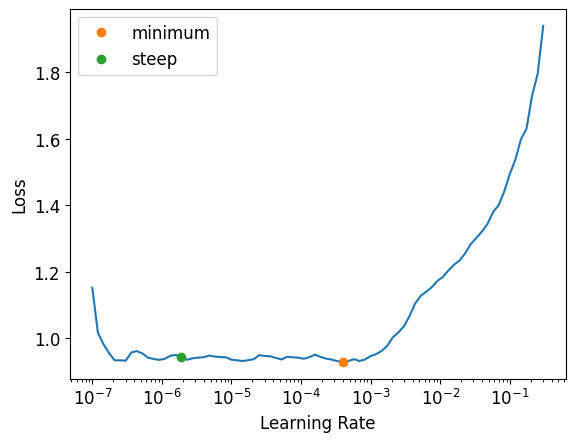

In [ ]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
learn.fit_one_cycle(3, 3e-4)

In [ ]:
learn.unfreeze()

SuggestedLRs(valley=0.00010964782268274575)

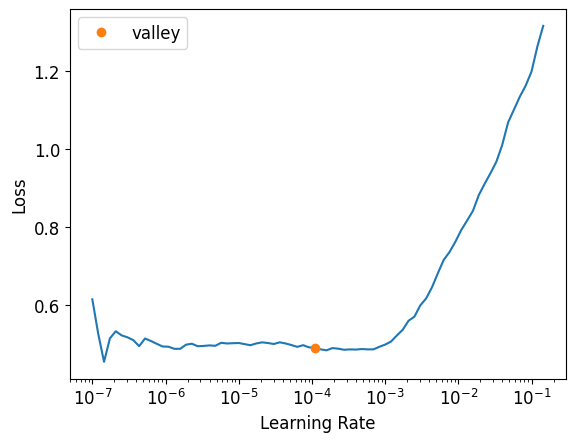

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 5e-5)

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

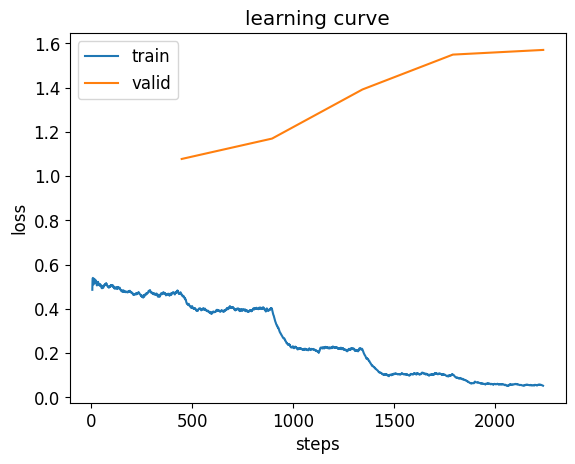

In [ ]:
learn.unfreeze()
learn.recorder.plot_loss()

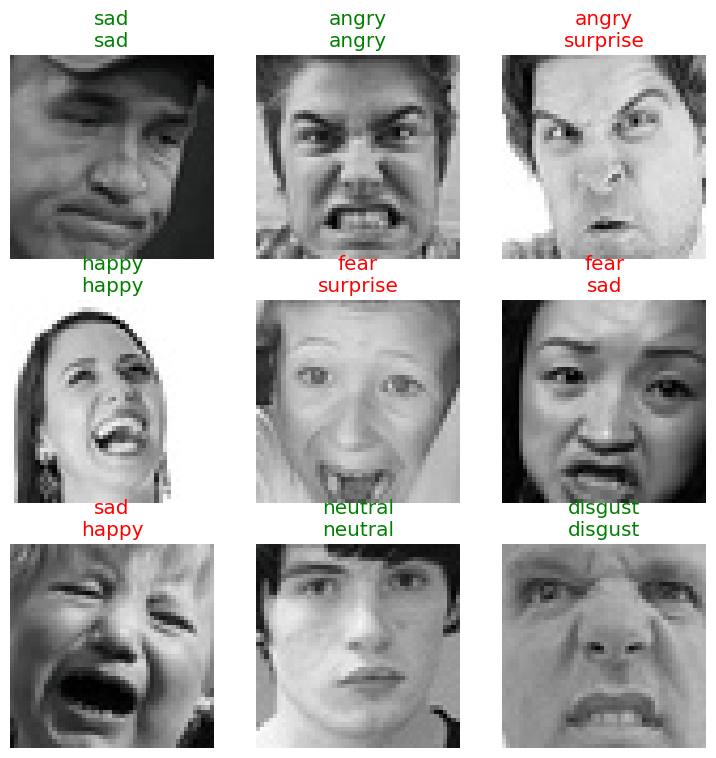

In [ ]:
learn.show_results()

In [ ]:
learn.save('mood.pkl',with_opt=False)

Path('models/mood.pkl.pth')

In [ ]:
learn.export('model.pkl')

In [ ]:
learn.predict('AcuraTLType-S2008.jpg')[0]

'Acura TL Sedan 2012'

NameError: name 'gr' is not defined

In [ ]:
load_learner('models/model.pth')

AttributeError: 'collections.OrderedDict' object has no attribute 'dls'